# Config Directories

In [82]:
import os
from utils import k_fold, data_split
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from utils.data_split import split_patterns

In [79]:
ROOT = '/wecare/home/khoi/thesis'
# CT scans and masks in raw nii format
DATA_FOLDER = '/wecare/projects/Slicer_ready_data/Original Patient Data/Normalised_Recsaled_data'
CT_SCANS = os.path.join(DATA_FOLDER,'Images')
MASKS = os.path.join(DATA_FOLDER,'Labels_nii')
# Dataset for the project
AUGMENTED_FOLDER = os.path.join(ROOT, 'ct_processed_aug')
AUGMENTED_SCANS = os.path.join(AUGMENTED_FOLDER, 'images') 
AUGMENTED_MASKS = os.path.join(AUGMENTED_FOLDER, 'masks')
AUGMENTED_LABELS = os.path.join(AUGMENTED_FOLDER, 'labels')
HYPEPARAMETERS = os.path.join(ROOT, 'parameters')
K_FOLDS = os.path.join(HYPEPARAMETERS, 'k_folds.csv')
k = 5

# Allocating Scans ID for k-fold

In [4]:
ct_masks_pattern = r'CTP[0-9]{2,3}_00[1|2]'
k_fold.allocate_id_k_fold(CT_SCANS, 
                         os.path.join(HYPEPARAMETERS, 'k_folds.csv'),
                         os.path.join(HYPEPARAMETERS, 'exclude_empty.csv'),
                         ct_masks_pattern)

In [10]:
df = pd.read_csv(K_FOLDS)

In [11]:
df

,fold_1,fold_2,fold_3,fold_4,fold_5
0,CTP69_001,CTP50_001,CTP63_001,CTP73_001,CTP51_001
1,CTP76_001,CTP62_001,CTP65_001,CTP77_002,CTP27_001
2,CTP42_001,CTP32_001,CTP86_001,CTP34_002,CTP57_001
3,CTP95_001,CTP102_001,CTP61_001,CTP56_001,CTP15_002
4,CTP45_001,CTP20_001,CTP39_001,CTP91_001,CTP100_001
5,CTP78_001,CTP02_001,CTP85_001,CTP86_002,CTP27_002
6,CTP29_001,CTP38_001,CTP41_001,CTP26_001,CTP28_001
7,CTP93_001,CTP90_001,CTP87_001,CTP83_001,CTP24_002
8,CTP24_001,CTP22_001,CTP60_001,CTP10_001,CTP77_001
9,CTP28_002,CTP07_001,CTP73_002,CTP15_001,CTP74_001


In [32]:
a = "CTP02_001_0623"
f"{a[:-5]}_0000_{a[-4:]}"

'CTP02_001_0000_0623'

# Changing values of masks to 0 and 255

## Testing

In [71]:
import matplotlib.pyplot as plt
from skimage.io import imread
from torchvision.io import read_image
import torchvision
import numpy as np

FOO = os.path.join(ROOT, 'foo')
foo_mask = imread(os.path.join(AUGMENTED_MASKS, 'CTP78_002_0423.png'), as_gray = True)
foo_mask_torch = read_image(os.path.join(AUGMENTED_MASKS, 'CTP78_002_0423.png'), mode = torchvision.io.ImageReadMode.GRAY)

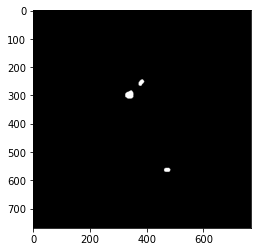

In [72]:
plt.imshow(foo_mask, cmap = plt.gray())

In [73]:
np.unique(foo_mask_torch, return_counts=True)

(array([  0, 255], dtype=uint8), array([588591,   1233]))

In [63]:
foo_mask_bin = foo_mask_torch[0]
foo_mask_bin[foo_mask_bin > 0] = 255
#foo_mask_bin = foo_mask_bin.
bin_img = Image.fromarray(bin_arr, mode = "L")

In [64]:
np.unique(foo_mask_bin)

array([  0, 255], dtype=uint8)

In [55]:
import matplotlib.cm as cm
plt.imsave(os.path.join(FOO, 'CTP78_002_0423_foo.png'), foo_mask_bin, cmap = plt.gray())

<Figure size 432x288 with 0 Axes>

In [56]:
foo_mask_new = read_image(os.path.join(FOO, 'CTP78_002_0423_foo.png'), mode = torchvision.io.ImageReadMode.GRAY)
np.unique(foo_mask_new)

array([  0, 255], dtype=uint8)

## Binarizing mask values

In [70]:
all_masks = os.listdir(AUGMENTED_MASKS)
for mask in tqdm(all_masks):
    full_mask_path = os.path.join(AUGMENTED_MASKS, mask)
    mask_arr_torch = read_image(full_mask_path, mode = torchvision.io.ImageReadMode.GRAY)
    mask_arr = mask_arr_torch[0]
    mask_arr[mask_arr > 0] = 255
    plt.imsave(full_mask_path, mask_arr, cmap = plt.gray())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43996/43996 [29:07<00:00, 25.17it/s]


<Figure size 432x288 with 0 Axes>

# Changing images name to be the same as mask/label name

Image names are now in the form 'CTP[0-9]{2,3}\_00[1|2]\_0000\_[0-9]{4}' <br>
Mask/Label names are now in the form 'CTP[0-9]{2,3}\_00[1|2]\_[0-9]{4}'

In [66]:
image_path_foo = 'CTP78_002_0000_0423.png'
mask_path_foo = 'CTP78_002_0423.png'

In [68]:
f"{image_path_foo[:-14]}_{image_path_foo[-8:]}"

'CTP78_002_0423.png'

In [74]:
all_images = os.listdir(AUGMENTED_SCANS)

for image_name in tqdm(all_images):
    new_name = f"{image_name[:-14]}_{image_name[-8:]}"
    new_path = os.path.join(AUGMENTED_SCANS, new_name)
    old_path = os.path.join(AUGMENTED_SCANS, image_name)
    os.rename(old_path, new_path)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43996/43996 [00:11<00:00, 3759.34it/s]


# Split data into k folders

In [77]:
k = 5

df = pd.read_csv(K_FOLDS)
all_dirs = [AUGMENTED_SCANS, AUGMENTED_MASKS, AUGMENTED_LABELS]

# Split slices in images, masks, and labels directories into corresponding k-fold.    
for DIR in all_dirs:
    for fold in range(k):
        pattern_list = pd.Series(df.loc[:,f"fold_{fold+1}"]).dropna().tolist()
        split_patterns(DIR, os.path.join(DIR, f"fold_{fold+1}"), pattern_list)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5478/5478 [00:00<00:00, 6308.64it/s]


# Create validation set for each k_fold session

Create fold_2_train.txt, ..., fold_5_train.txt for hold_out_1. Also create fold_2_val.txt, ..., fold_5_val.txt. <br>
fold_2_train.txt contains all files in fold 2 that should be used for training <br>
fold_2_val.txt contains all files in fold 2 that should be used for validating <br>

In [83]:
Path().cwd()

PosixPath('/wecare/home/khoi/thesis')

In [92]:
val_ratio = 0.1

# Sampling validation set for images
for fold in range(1,k+1):
    all_images = os.listdir(os.path.join(AUGMENTED_FOLDER, "images", f"fold_{fold}"))
    print(f"There are {len(all_images)} files in fold_{fold}")
    
    val_samples = int(val_ratio * len(all_images))
    print(f"{val_samples} slices will be used as validation")
    
    files_for_val = random.sample(all_images, k = val_samples)
    files_remain_train = list(set(all_images).difference(set(files_for_val)))
    print(f"There remains {len(files_remain_train)} files for training")
    
    with open(os.path.join(AUGMENTED_SCANS, f'fold_{fold}_train.txt'), 'a') as f:
        for file in files_remain_train:
            f.write(f"./fold_{fold}/{file}\n")
    
    with open(os.path.join(AUGMENTED_SCANS, f'fold_{fold}_val.txt'), 'a') as f:
        for file in files_for_val:
            f.write(f"./fold_{fold}/{file}\n")

There are 13011 files in fold_1
1301 slices will be used as validation
There remains 11710 files for training
There are 12777 files in fold_2
1277 slices will be used as validation
There remains 11500 files for training
There are 11286 files in fold_3
1128 slices will be used as validation
There remains 10158 files for training
There are 15283 files in fold_4
1528 slices will be used as validation
There remains 13755 files for training
There are 14289 files in fold_5
1428 slices will be used as validation
There remains 12861 files for training


In [89]:
f"images/fold_{fold}/{file}\n"

'images/fold_5/CTP78_002_0426_aug06.txt\n'